# Netflix: Exploratory Data Analysis (EDA)

por Leticia Molina Mazarin 

El objetivo de este trabajo es realizar un analisis exploratorio de datos de los títulos de Netflix para comprobar algunas hipótesis de partida. 

Para ello, se simula un escenario en el que Netflix en España quiere apostar por un nuevo título producido nacionalmente. Piden un estudio para entender la oferta de contenidos que ya existe actualmente en Netflix, los principales países productores, las categorías de películas y series y el público alvo. 

La hipotesis inicial del equipo en España es que Netflix cuenta con más películas que series porque son más rápidas de producirse pero que la oferta de series viene creciendo en los últimos años. Además, aunque haya más películas, el equipo cree que las series son el tipo de contenido que se hace más viral y que logra conquistar por más tiempo un espacio en los Top 10 semanales. 

Quieren saber cual sería el mejor mes para estrenar una película basada en un libro de Novela Negra, si hay un día de la semana que es mejor para el lanzamiento (creen que durante el fin de semana) y cual sería la duración media ideal de dicha película (creen que aproximadamente 1 hora y media sería lo ideal).

El equipo ha encomendado este analisis para comprobar su hipotesis y finalmente decidir cual será la siguiente producción de Netflix España que logrará relevancia global.


In [1]:
# Importación de las librerías necesarias para la realización del análisis de los datos

from UTILS.functions import *
from UTILS.librerias import *

## Importación del fichero de datos

In [2]:
# Cargamos el fichero con la base de datos que analisaremos

df = import_file(path,'netflix_database.csv')


In [3]:
# Miramos las dimensiones de nuestro fichero.

print(f'El fichero bruto cuenta con {df.shape[0]} filas y {df.shape[1]} columnas')


El fichero bruto cuenta con 8806 filas y 12 columnas


In [4]:
df.dtypes


show_id               object
type                  object
title                 object
director              object
cast                  object
production_country    object
date_added            object
release_year           int64
rating                object
duration              object
description           object
listed_in             object
dtype: object

La gran mayoría de los datos son 'object', contamos solamente con una columna de dato 'int', la cual representa el año de lanzamiento del título.

Esta base de datos contiene la relación de títulos de Netflix hasta septiembre de 2021:

- La columna 'show_id' no nos aporta información adicional, se opta por utilizar la columna 'title' y eliminar 'show_id'
- La columna 'type' enseña si determinado título es una película o una serie.
- La columna 'title' enseña el nombre de la serie o película.
- También es posible ver la información sobre el director o directora y el cast.
- La columna 'production_country' enseña el país de producción de dicho título.
- En la columna 'date_added' es posible ver la fecha en la que determinado título fue añadido a la plataforma de Netflix, mientras que la columna 'release_year' enseña el año en el que ese título tuvo su lanzamiento. Sabemos que hay muchos títulos que ya son originales de Netflix y se lanzan directamente en la plataforma, pero hay algunas películas o series que no son originales de Netflix y tuvieron un lanzamiento antes de entrar en la plataforma. 
- En la columna 'rating' se puede ver la clasificación etaria de los títulos y tener una idea del público a que se destina determinado título. 
- La columna 'duración' enseña cuanto tiempo dura una película en minutos y una serie en cantidad de temporadas. 
- La columna 'listed_in' enseña las categorías de cada título y 'description' nos trae una descripción de la película o serie. 

De primeras, ya nos damos cuenta de que hay algunos valores nulos (NaN) que deberán ser tratados más adelante.

También vemos que a lo mejor hay columnas que no son necesarias para nuestro analisis, como es el caso de show_id.

## Tratando los datos

Después de mirar la base de datos cruda, se plantean algunas preguntas:

- ¿Son necesarias todas las variables para trabajar? De primeras se sabe que la columna 'show_id' no aportará nada al analisis y se puede borrarla.
- ¿Es necesario tratar alguna variable? Se sabe que hay valores nulos y variables de tiempo que deben tratarse.
- ¿Hay valores duplicados?
- ¿Debería crearse nuevas variables para ayudar en el analisis?

### Valores Nulos

In [5]:
# Empezamos mirando si hay valores nulos

missing_data(df)

,Total,Percent
director,2634,0.299114
production_country,826,0.093800
cast,825,0.093686
date_added,10,0.001136
rating,4,0.000454
duration,3,0.000341
show_id,0,0.000000
type,0,0.000000
title,0,0.000000
release_year,0,0.000000


- Casi un 30% de los datos no cuenta con la información de director. Como dicha variable no es de gran importancia para el analisis, simplemente se eliminará esa columna. 
- Para las columnas 'country' y 'cast' se añadirá un texto indicando que no hay información para que dichos títulos se mantengan en el analisis.
- Se decide eliminar los títulos sin fecha de lanzamiento, rating y duración porque son pocos datos.

In [6]:
# Sustituimos los valores nulos por la información 'No Info' u 'Others' en la mayoría de los casos.
# La información más importante para este analisis es la de países.

df['production_country'].replace(np.nan, 'Others', inplace = True)
df['director'].replace(np.nan, 'No info', inplace = True)
df['cast'].replace(np.nan, 'No info', inplace = True)

# eliminamos columnas que no utilizaré en el analisis: 'show_id' y 'director'
df_2 = df.drop(["show_id","director"], axis=1)

# Seguimos con valores nulos en duration, rating y date_added, pero como son pocos, los eliminaré directamente
df_2.dropna(inplace=True)

In [7]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8789 entries, 0 to 8805
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   type                8789 non-null   object
 1   title               8789 non-null   object
 2   cast                8789 non-null   object
 3   production_country  8789 non-null   object
 4   date_added          8789 non-null   object
 5   release_year        8789 non-null   int64 
 6   rating              8789 non-null   object
 7   duration            8789 non-null   object
 8   description         8789 non-null   object
 9   listed_in           8789 non-null   object
dtypes: int64(1), object(9)
memory usage: 755.3+ KB


A partir de ahora pasaremos a utilizar 'df_2', que es el nuevo DataFrame tratado.

Vemos que las columnas 'show_id' y 'director' ya no están. Además, podemos ver que ya no hay valores nulos.

### Datetime - tratando las fechas

Las fechas todavía no están del todo correctas.

Para tratarlas, primero transformamos 'date_added' en *datetime* porque todavía es un *object*.

Después, crearemos cuatro nuevas columnas para poder separar esas fechas en año, mes (nombre y número) y semana.

In [8]:
df_2["date_added"] = pd.to_datetime(df_2['date_added'])

df_2['month_added_name'] = df_2['date_added'].dt.month_name()
df_2['week_day'] = df_2['date_added'].dt.day_name()
df_2['month_added_number'] = df_2['date_added'].dt.month
df_2['year_added'] = df_2['date_added'].dt.year

### Tratando la columna 'country'

Miramos como es la columna de países para asegurarnos de que solo haya un país por columna. 

Como muchas producciones se hacen en sociedad con distintos países, vemos que efectivamente hay títulos con más de un país.

Decido entonces considerar el primer país que aparece.

In [9]:
df_2['production_country'].sample(15)

1067                      Thailand
3063                   South Korea
6528                        Turkey
2413                         India
3496                         India
6347                        Canada
7137                        Others
6624                 United States
2759                        Others
1834                   South Korea
8267                United Kingdom
1074                        Others
7052                         India
3237                        France
5659    France, South Korea, Japan
Name: production_country, dtype: object

Para facilitar el analisis, limpiamos esta información para dejar un único país en esa columna. 

Para ello, creamos una función que considerará el primer país que aparece.

Además decidimos qué países limpiar y simplificar:

- United States será USA
- United Kingdom será UK
- South Korea será S.Korea
- United Arab Emirates será UAE
- Czech Republic será Czechia
- West Germany será Germany
- Soviet Union será Russia
- South Africa será S.Africa

In [10]:
clean_country(df_2,'production_country', 'prod_country')
    

In [11]:
df_2.head()

,type,title,cast,date_added,release_year,rating,duration,description,listed_in,month_added_name,week_day,month_added_number,year_added,prod_country
0,Movie,Dick Johnson Is Dead,No info,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Documentaries,September,Saturday,9,2021,USA
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...","International TV Shows, TV Dramas, TV Mysteries",September,Friday,9,2021,S.Africa
2,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",2021-09-24,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,"Crime TV Shows, International TV Shows, TV Act...",September,Friday,9,2021,Others
3,TV Show,Jailbirds New Orleans,No info,2021-09-24,2021,TV-MA,1 Season,"Feuds, flirtations and toilet talk go down amo...","Docuseries, Reality TV",September,Friday,9,2021,Others
4,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",2021-09-24,2021,TV-MA,2 Seasons,In a city of coaching centers known to train I...,"International TV Shows, Romantic TV Shows, TV ...",September,Friday,9,2021,India


### Tratando la columna 'rating'

La clasificación etaria todavía es un poco confusa y la simplificaremos para dejar únicamente:

- Toddlers
- Kids
- Teen
- Adults

De acuerdo con la siguiente página web, podemos considerar:

- TV-PG: Kids
- TV-MA: Adults
- TV-Y7-FV: Kids
- TV-Y7: Kids
- TV-14: Teens
- R: Adults
- TV-Y: Toddler
- NR: Adults
- PG-13: Teens
- TV-G: Kids
- PG: Kids
- G: Kids
- UR: Adults
- NC-17: Adults

In [12]:
rename_rating(df_2,'rating')

df_2['rating'].unique()

array(['Teens', 'Adults', 'Kids', 'Toddlers'], dtype=object)

### Tratando la columna 'listed_in'

Así como en la columna que representa el país de producción, la columna de categorías 'listed_in' cuenta con más de una categoría por título en Netflix. 

Sin embargo, a diferencia de lo que se hizo para tratar los países de producción (que se ha considerado el primer país de la lista), aquí hay algunas categorías que no dicen mucho o que son redundantes con otras informaciones. 

Por ejemplo, si sabemos que un título es producido en España y la primera categoría en la que se encuentra es 'Spanish-Language TV Show', esa categoría es redundante y, a lo mejor, nos interesa más considerar la segunda categoría que aparece.

Para ello, separamos la columna 'listed_in' en distintas columnas separadas por la coma.

In [13]:
clean_categories(df_2,'listed_in', 'category')

In [14]:
df_2.head()

,type,title,cast,date_added,release_year,rating,duration,description,listed_in,month_added_name,week_day,month_added_number,year_added,prod_country,category
0,Movie,Dick Johnson Is Dead,No info,2021-09-25,2020,Teens,90 min,"As her father nears the end of his life, filmm...",Documentaries,September,Saturday,9,2021,USA,Documentaries
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...","International TV Shows, TV Dramas, TV Mysteries",September,Friday,9,2021,S.Africa,Drama
2,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",2021-09-24,2021,Adults,1 Season,To protect his family from a powerful drug lor...,"Crime TV Shows, International TV Shows, TV Act...",September,Friday,9,2021,Others,Thriller
3,TV Show,Jailbirds New Orleans,No info,2021-09-24,2021,Adults,1 Season,"Feuds, flirtations and toilet talk go down amo...","Docuseries, Reality TV",September,Friday,9,2021,Others,Documentaries
4,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",2021-09-24,2021,Adults,2 Seasons,In a city of coaching centers known to train I...,"International TV Shows, Romantic TV Shows, TV ...",September,Friday,9,2021,India,Romance


In [15]:
# después de tratar los datos, guardamos ese documento para empezar a analizarlos.
df_2.to_csv('/Users/leticiamazarinmolina/Documents/THE_BRIDGE/EDA/EDA_Leticia_Molina/SRC/DATA/df_netflix.csv', index = False)

## Analizando los datos

Miramos la proporción de tipo de contenidos. 

¿Hay más películas o series en Netflix?

In [16]:
# Cargamos el documento tratado.
df_3 = import_file(path,'df_netflix.csv')

# Creamos una nueva columna en el dataset que nos servirá de ayuda para crear los gráficos
df_3['count'] = 1


## Evolución de los contenidos a lo largo de los años

Sabemos que Netflix se hizo global en el año 2016. ¿Cómo ha evolucionado el ingreso de nuevos contenidos a lo largo de los años?

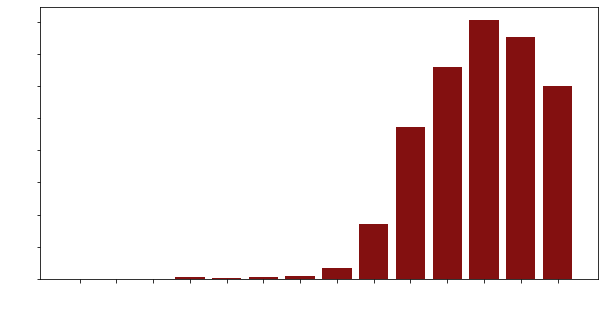

In [17]:
data_year = df_3.groupby('year_added')['count'].sum()

bar_graph_1(data_year, 'yearly_content_all',0,2200,250, color_bar='#831010')


La oferta de contenidos venía creciendo y su tendencia al alza cambió en el año 2020 muy probablemente a causa de la pandemia. Sabemos que muchas producciones tuvieron que paralizarse y muchos estrenos se postergaron al 2021. 

Es importante acordarse de que la base de datos que tenemos solo cuenta con títulos subidos hasta septiembre del 2021, por lo que dejamos de contar con 4 meses y no podemos afirmar si la oferta de contenidos ha sido mayor o menor en el 2021 que en el 2020. 

Para ello, creamos un nuevo gráfico considerando solamente la oferta de contenidos hasta septiembre de cada año.

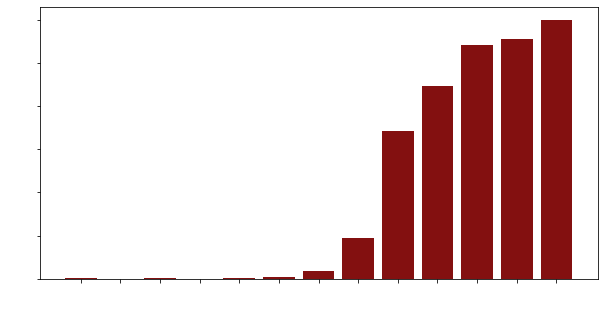

In [18]:
data_year_tillseptember = df_3[df_3['month_added_number']<=9]

data_year_tillseptember_ = data_year_tillseptember.groupby('year_added')['count'].sum()

bar_graph_1(data_year_tillseptember_, 'yearly_content_tillseptember', 0, 1750, 250, color_bar='#831010')

De hecho, si nos centramos en los títulos añadidos hasta septiembre de cada año, podemos ver que en el 2021 hubo un aumento en la oferta de contenidos dentro de la plataforma (por lo menos hasta septiembre). Mientras que en el año 2020 podemos ver claramente que la tendencia de aumento en la oferta de contenidos ya empieza a caer y podemos concluir que el último quarter del año ha sido el más afectado.

Miramos un nuevo gráfico que considera el último quarter de cada año.

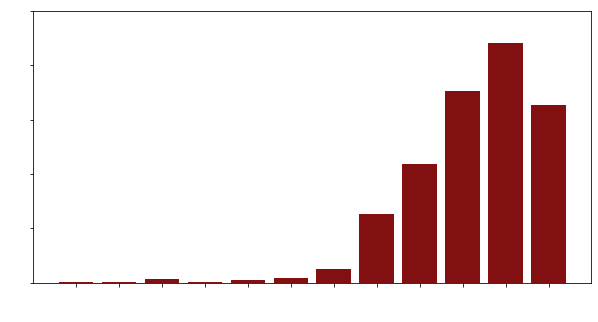

In [19]:
data_year_afterseptember = df_3[df_3['month_added_number']>9]

data_year_afterseptember_ = data_year_afterseptember.groupby('year_added')['count'].sum()

bar_graph_1(data_year_afterseptember_, 'yearly_content_afterseptember', 0, 800, 150, color_bar='#831010')

## Estacionalidad de la oferta de contenidos.

Después de mirar la evolución de la oferta de contenidos a lo largo de los años, queremos verificar si hay meses en los que hay más oferta de contenidos que en otros:


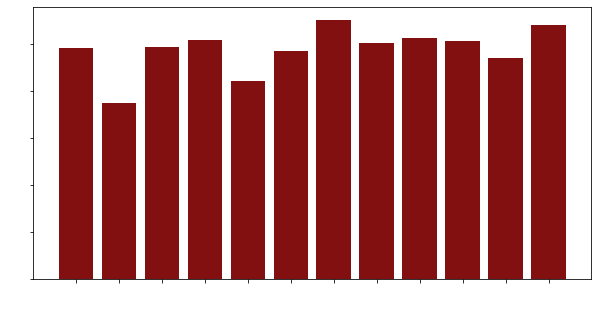

In [20]:
data_month_ = df_3.groupby('month_added_number')['count'].sum()

bar_graph_1(data_month_, 'monthly_entries_all', 0, 800, 150, color_bar='#831010')

Como nuestros datos no cuentan con los últimos meses de 2021, queremos verificar si la distribución de contenidos por mes vista anteriormente no está siendo afectada por esa falta de datos del último quarter de 2021. 

Para ello, volvemos a hacer el gráfico pero eliminando directamente el año de 2021:

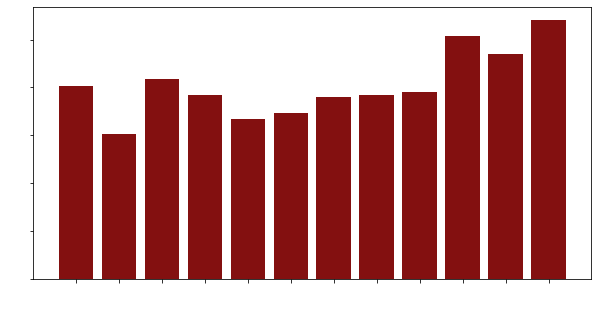

In [21]:
# Desconsiderando el año de 2021 (porque no tenemos datos del año entero)
df_offer_month = df_3.loc[
    (df_3['year_added'] < 2021),
    ['type', 'month_added_number', 'count', 'month_added_name']
]
data_month = df_offer_month.groupby('month_added_number')['count'].sum()

bar_graph_1(data_month, 'monthly_entries_without2021', 0, 800, 150, color_bar='#831010')

In [22]:
# Confirmamos la relación con un test de hipotesis
# Creamos una tabla cruzada
monthly_adds = pd.crosstab(df_offer_month['month_added_name'], df_offer_month['count'])

# Hacemos el test chi cuadrado
data = monthly_adds
statistic, pvalue = chisquare(data)

print(pvalue)

if pvalue > 0.05:
    print('Aceptamos la hipotesis nula: No hay relación entre los meses del año y la oferta de nuevos títulos')
else: 
    print('Rechazamos la hipotesis nula: Sí hay relación entre los meses del año y la oferta de nuevos títulos')

[5.79162403e-37]
Rechazamos la hipotesis nula: Sí hay relación entre los meses del año y la oferta de nuevos títulos


Si desconsideramos el año de 2021, vemos que efectivamente el último quarter es el que suele ser más representativo en los estrenos, mientras que el mes de febrero es el que menos estrenos tiene. 

Por otro lado, al considerar los días de la semana, vemos que, diferentemente de lo que se imaginaba, el fin de semana (sábado y domingo) es el momento de la semana que cuenta con menos estrenos mientras que el viernes es disparado el día preferido para los lanzamientos de nuevos títulos. 

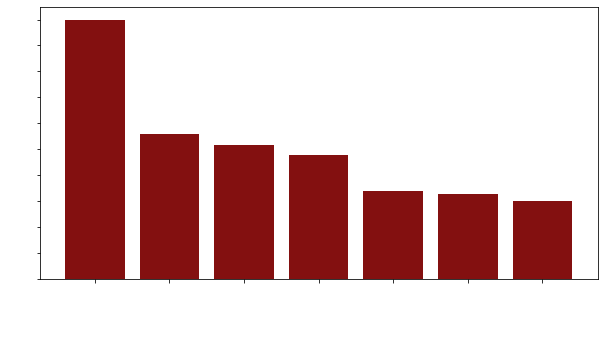

In [23]:
data_week = df_3.groupby('week_day')['count'].sum().sort_values(ascending=False)

bar_graph_1(data_week, 'weekly_entries', 0, 2750, 250, color_bar='#831010')


## Porcentaje de películas vs. series

Como ya se suponía, la gran mayoría de contenidos en Netflix son películas.

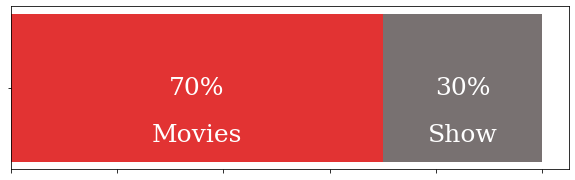

In [24]:
plot_distribution(df_3, 'type', 'Movie', 'TV Show', 'distribution')

## Principales países productores de contenido en Netflix

¿Cuáles son los principales países productores de contenido en Netflix?
¿Hay alguno que produzca más series que películas?

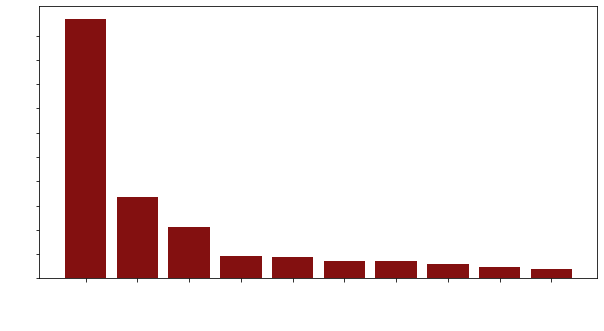

In [75]:
# Se crea un nuevo DataFrame eliminando 'Others' de la columna 'prod_country' porque no aporta información
df_country = df_3.loc[
    (df_3['prod_country']!='Others'),
    ['prod_country', 'count', 'type', 'rating']
]

data_country = df_country.groupby('prod_country')['count'].sum().sort_values(ascending=False)[:10]

bar_graph_1(data_country, 'prod_countries', 0, 3300, 300, color_bar='#831010')

/Users/leticiamazarinmolina/Documents/THE_BRIDGE/EDA/EDA_Leticia_Molina/SRC/UTILS/functions.py:297: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(data_ratio.index, fontsize=11, color=color_)


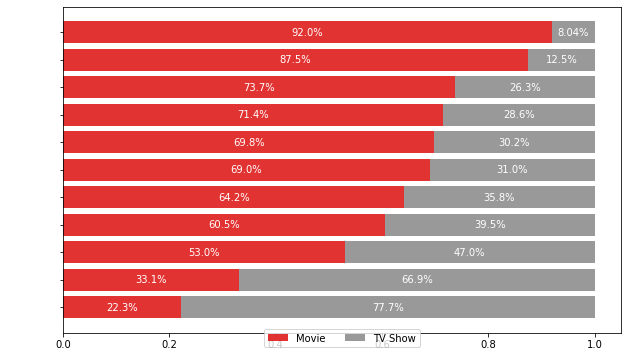

In [73]:
movie_show_percountry(df_country, 'show_movie_percountry')

Concluimos que EEUU es disparado el primer productor de contenidos para Netflix y que más del 70% de estos contenidos son películas. 

El segundo mayor productor es India y más del 90% de los contenidos son películas.

Japón y Corea del Sur son los dos países que producen más series que películas.

## Rating

/Users/leticiamazarinmolina/Documents/THE_BRIDGE/EDA/EDA_Leticia_Molina/SRC/UTILS/functions.py:337: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(data_ratio_1.index, fontfamily='serif', fontsize=11, color=color_)


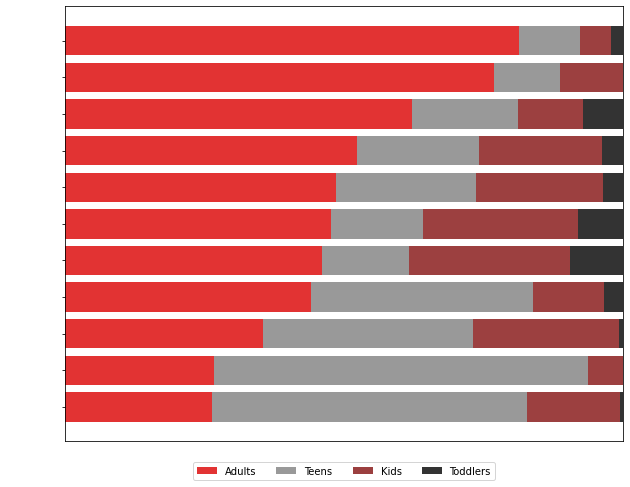

In [77]:
rating_plot(df_country, 'rating_per_country')

## Categorías

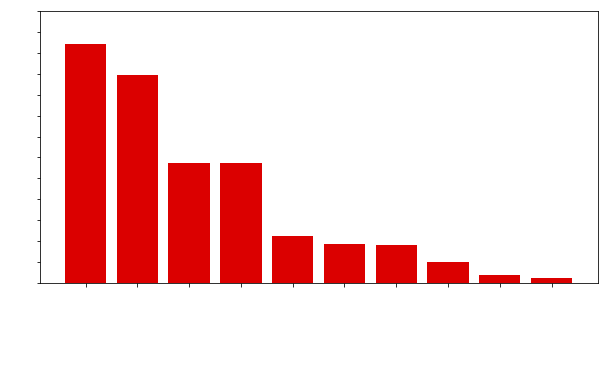

In [28]:
df_movie = df_3.loc[
    df_3.type.str.contains('Movie'),
    ['title','category','prod_country', 'count']
]

data_category_1 = df_movie.groupby('category')['count'].sum().sort_values(ascending=False)[:10]

bar_graph_1(data_category_1, 'movies_main_categories', 0, 2000, 150, rotation_=50)

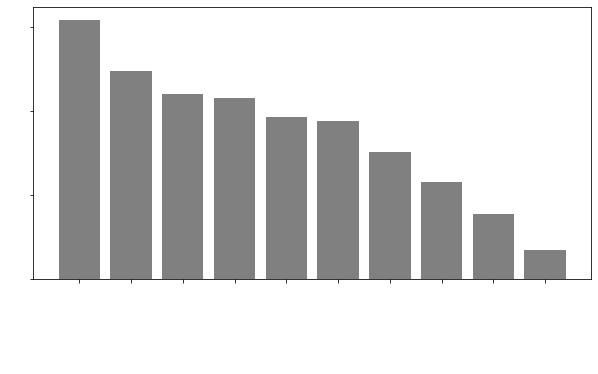

In [29]:
df_show = df_3.loc[
    df_3.type.str.contains('TV Show'),
    ['title','category','prod_country','count']
]

data_category_2 = df_show.groupby('category')['count'].sum().sort_values(ascending=False)[:10]

bar_graph_1(data_category_2, 'tvshow_main_categories', 0, 600, 150, rotation_=50, color_bar='grey')

Miramos las principales categorías de series y de películas producidas en España:

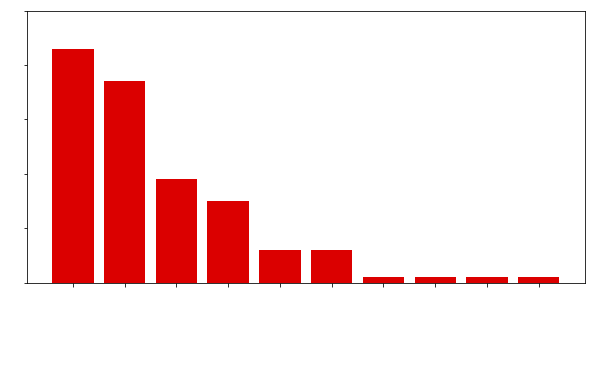

In [30]:
df_categories_spain = df_3.loc[
    ((df_3['prod_country']=='Spain') & (df_3['type']=='Movie')),
    ['category', 'type', 'count', 'year_added']
]

data_category_spain = df_categories_spain.groupby('category')['count'].sum().sort_values(ascending=False)[:10]

bar_graph_1(data_category_spain, 'spain_movies_main_categories', 0, 60, 10, rotation_=60)

## Thrillers

Los productores de Netflix España detienen el derecho de producción de película o serie de los libros de Carmen Mola.

Como se encajan en el género de Thrillers, quieren mirar más detenidamente información acerca de ese género. 

Primero miramos si hay alguna estacionalidad para esa categoría.

La hipotesis de partida es que contenidos relacionados con los géneros Thriller y Horror tendrán más estrenos en los meses de septiembre y octubre a causa de Halloween. 

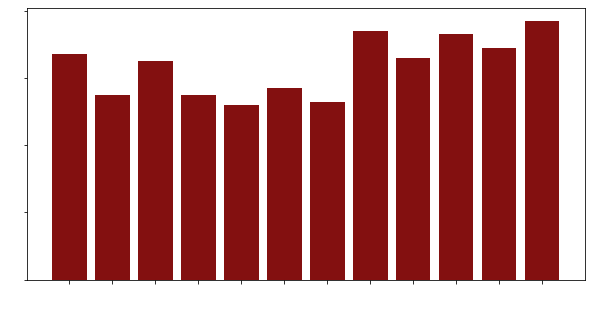

In [31]:
df_thriller = df_3.loc[
    ((df_3['year_added']<2021))&((df_3['category']=='Thriller') | (df_3['category']=='Horror')),
    ('count', 'month_added_number', 'month_added_name', 'prod_country')
    ]
# Lo agrupamos
data_thriller = df_thriller.groupby('month_added_number')['count'].sum()

bar_graph_1(data_thriller, 'monthly_thriller_entries', 0, 100, 20, color_bar='#831010')

A simple vista parece que sí hay un aumento en la oferta de thrillers a partir de agosto, pero podría estar simplemente relacionado con el hecho de que la oferta de contenidos en general se sube en el último quarter de los años. 

Como los números no son muy significativos, hacemos un test de hipotesis para comprobarlo.

In [32]:
# Creamos una tabla cruzada
thrillers = pd.crosstab(df_thriller['month_added_name'], df_thriller['count'])

# Hacemos el test chi cuadrado
data = thrillers
statistic, pvalue = chisquare(data)

print(pvalue)

if pvalue > 0.05:
    print('Aceptamos la hipotesis nula: No hay relación entre los meses del año y la oferta de títulos de género Thriller y Horror')
else: 
    print('Rechazamos la hipotesis nula: Sí hay relación entre los meses del año y la oferta de títulos de género Thriller y Horror')

[0.25762123]
Aceptamos la hipotesis nula: No hay relación entre los meses del año y la oferta de títulos de género Thriller y Horror


Y concluimos que no hay relación entre los meses y la oferta de títulos de género Thriller y Horror. 

Ahora miramos más al detalle la oferta de contenidos producidos en España.

Ya habíamos visto que la categoría principal es drama, seguida de comédia y thriller en tercer lugar. Sin embargo, si hacemos una tabla cruzada de las categorías de las producciones españolas y el tipo de contenido, vemos que la gran mayoría de series españolas son de la categoría Thriller

In [33]:
spain = pd.crosstab(df_categories_spain['category'], df_categories_spain['type'])

spain

type,Movie
category,
Action & Adventure,6
Comedy,37
Documentaries,19
Drama,43
Horror,6
Musical,1
Other,1
Sci-Fi & Fantasy,1
Stand-Up Comedy,1


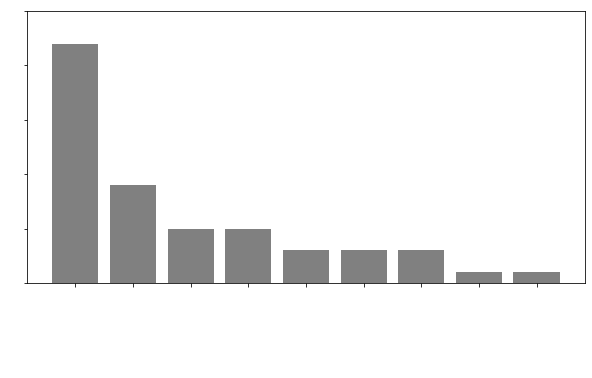

In [34]:
df_categories_spain_1 = df_3.loc[
    ((df_3['prod_country']=='Spain'))&((df_3['type']=='TV Show')),
    ['category', 'type', 'count', 'year_added']
]

data_category_spain_1 = df_categories_spain_1.groupby('category')['count'].sum().sort_values(ascending=False)[:10]

bar_graph_1(data_category_spain_1, 'tv_show_spain_main_categories', 0, 30, 5, rotation_=50, color_bar='grey')

## Minutes Peliculas

Se hace un rápido estudio de los minutos de las películas. 

Por el gráfico se puede concluir que la mayoría de las películas tiene una duración de entre 90 y 100 minutos.

Entretanto, al hacer el test de normalidad, nos sale que no sigue una distribución normal.


In [35]:
min_movies = df_3.loc[
    (df_3['type'] == 'Movie'),
    ['title', 'category', 'count', 'duration']
]

col_min = min_movies["duration"].str.split(" ",expand=True)

min_movies['duration'] = col_min[0].astype(str).astype(int)

In [36]:
from scipy.stats import chisquare

data = min_movies['duration']
statistic, pvalue = chisquare(data)

print(f'stat = {statistic}, p = {pvalue}')

if pvalue > 0.05:
    print('Aceptamos Hipotesis Nula: Distribución Normal')
else:
    print('Rechazamos Hipotesis Nula: Distribución no Normal')

stat = 49196.59558672838, p = 0.0
Rechazamos Hipotesis Nula: Distribución no Normal


In [37]:
from scipy.stats import normaltest

data_2 = min_movies['duration']

stat, p = normaltest(data_2)

print('stat=%.3f, p=%.3f\n' % (stat,p))

if p > 0.05:
    print('Aceptamos Hipotesis Nula: Distribución Normal')
else:
    print('Rechazamos Hipotesis Nula: Distribución no Normal')

stat=374.523, p=0.000

Rechazamos Hipotesis Nula: Distribución no Normal


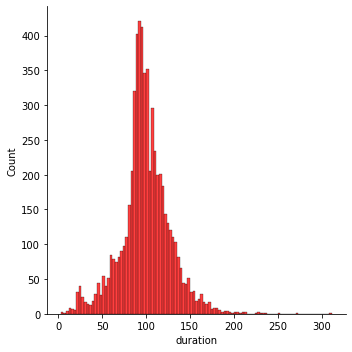

In [38]:
import seaborn as sns

measurements = min_movies['duration']

ax = sns.displot(measurements, color='red')

## Top 10 título semanales

Introducimos una nueva base de datos para analizar los principales títulos que estuvieron en evidencia desde junio de 2021.

En esta nueva base de datos tenemos muchos títulos que no están en la primera base analizada porque la primera base solo cuenta con información de títulos subidos hasta septiembre de 2021, pero podremos usarla para complementar las conclusiones que hemos sacado en la primera parte del analisis. 



## Tratando los datos

In [78]:
file_topt10 = 'Top_ten_v1.csv'
df_top10 = pd.read_csv(path+file_topt10)

In [79]:
# Miramos las dimensiones de nuestro fichero.

print(f'El fichero bruto cuenta con {df_top10.shape[0]} filas y {df_top10.shape[1]} columnas')

El fichero bruto cuenta con 1603 filas y 8 columnas


In [80]:
df_top10.dtypes

week_                  object
type_                  object
show_title             object
season_title           object
weekly_hours_viewed     int64
rating_                object
category_              object
prod_country_          object
dtype: object

In [81]:
del df_top10['season_title']

df_top10['count'] = 1

In [82]:
missing_data(df_top10)

,Total,Percent
prod_country_,534,0.333125
rating_,398,0.248284
category_,398,0.248284
week_,0,0.000000
type_,0,0.000000
show_title,0,0.000000
weekly_hours_viewed,0,0.000000
count,0,0.000000


In [83]:
# Seguimos con valores nulos en duration, rating y date_added, pero como son pocos, los eliminaré directamente
df_top10.dropna(inplace=True)

In [84]:
df_top10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1069 entries, 0 to 1601
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   week_                1069 non-null   object
 1   type_                1069 non-null   object
 2   show_title           1069 non-null   object
 3   weekly_hours_viewed  1069 non-null   int64 
 4   rating_              1069 non-null   object
 5   category_            1069 non-null   object
 6   prod_country_        1069 non-null   object
 7   count                1069 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 75.2+ KB


In [85]:
df_top10["week"] = pd.to_datetime(df_top10['week_'])

df_top10['month_'] = df_top10['week'].dt.month_name()
df_top10['week_number'] = df_top10['week'].dt.week
df_top10['week_day'] = df_top10['week'].dt.day_name()
df_top10['year_'] = df_top10['week'].dt.year

/var/folders/4s/ssj6hqrx2pd25m6n5s48w37h0000gn/T/ipykernel_2716/2663420745.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_top10['week_number'] = df_top10['week'].dt.week


In [86]:
del df_top10['week_']

In [87]:
clean_country(df_top10,'prod_country_', 'prod_country')

In [88]:
rename_rating(df_top10,'rating_')

In [89]:
clean_categories(df_top10,'category_', 'category')

In [91]:
df_top10['type_'].unique()

array(['Films (English)', 'Films (Non-English)', 'TV (English)',
       'TV (Non-English)'], dtype=object)

In [92]:
type_names ={
    'Films (English)': 'Movie',
    'Films (Non-English)': 'Movie',
    'TV (English)': 'TV Show',
    'TV (Non-English)': 'TV Show'
}

df_top10['type_'].replace(type_names, inplace=True)

In [93]:
df_top10.head()

,type_,show_title,weekly_hours_viewed,rating_,category_,count,week,month_,week_number,week_day,year_,prod_country,category
0,Movie,Choose or Die,15260000,Adults,Thrillers,1,2022-04-24,April,16,Sunday,2022,USA,Thriller
1,Movie,The In Between,13350000,Teens,"Drama, Romance",1,2022-04-24,April,16,Sunday,2022,USA,Drama
2,Movie,White Hot: The Rise & Fall of Abercrombie & Fitch,9920000,Adults,Documentaries,1,2022-04-24,April,16,Sunday,2022,USA,Documentaries
3,Movie,How It Ends,8280000,Adults,"Action & Adventure, Sci-Fi & Fantasy",1,2022-04-24,April,16,Sunday,2022,USA,Action & Adventure
4,Movie,Yakuza Princess,7490000,Adults,"Sci-Fi & Fantasy, Action & Adventure",1,2022-04-24,April,16,Sunday,2022,Japan,Sci-Fi & Fantasy


## Analizamos los datos de España

In [121]:
# Seleccionamos solo los contenidos españoles que estuvieron en los top 10
df_spain_top10 = df_top10.loc[
    (df_top10['prod_country']=='Spain'),
    ['type_', 'show_title', 'rating_', 'category', 'count', 'month_', 'week_number', 'year_']
]

Vamos que casi un 70% de las veces en las que un contenido de producción española estuvo en los top 10 globales de Netflix, ese contenido era una serie.

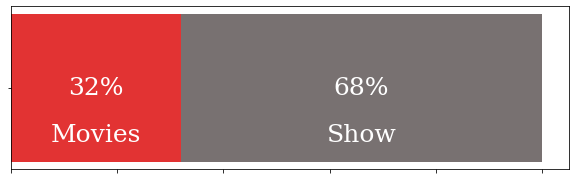

In [122]:
plot_distribution(df_spain_top10, 'type_', 'Movie', 'TV Show', 'popular_spain_distribution')

La categoría de producción española que más semanas estuvo en los top 10 globales fue Thriller.

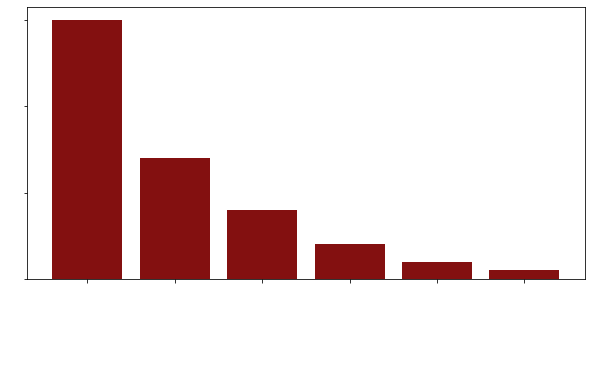

In [116]:
data_pop_spain_category = df_spain_top10.groupby('category')['count'].sum().sort_values(ascending=False)[:10]

bar_graph_1(data_pop_spain_category, 'weekly_top_10_categories', 0, 40, 10, color_bar='#831010')

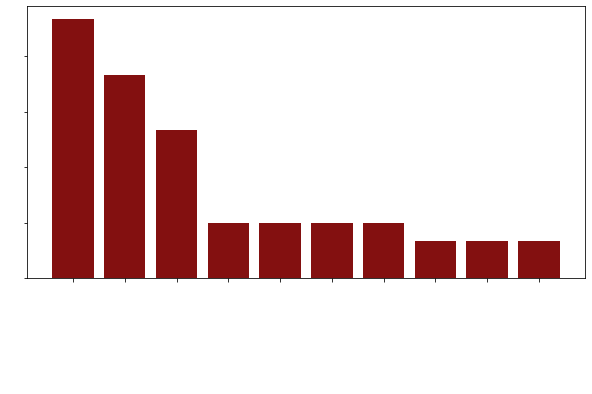

In [128]:
# Aquí podemos ver los 10 principales títulos españoles que estuvieron en la lista de top 10 globales.
# La principal producción española sigue siendo La Casa de Papel.

data_pop_spain = df_spain_top10.groupby('show_title')['count'].sum().sort_values(ascending=False)[:10]

bar_graph_1(data_pop_spain, 'weekly_top_10_spanish_content', 0, 15, 3, color_bar='#831010')